In [1]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd

In [2]:
df = pd.read_csv('customer_complaints_1.csv')
df.head()

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...


In [4]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

In [6]:
# Define the number of clusters
k = 3

# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [7]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [8]:
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [9]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 rude
 on
 to
 day
 my
 service
 was
 rep
 with
 me

Cluster 1:
 you
 the
 to
 they
 is
 and
 it
 that
 for
 but

Cluster 2:
 the
 and
 to
 for
 internet
 my
 was
 it
 that
 out



In [10]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.5263157894736842


IndexError: list index out of range

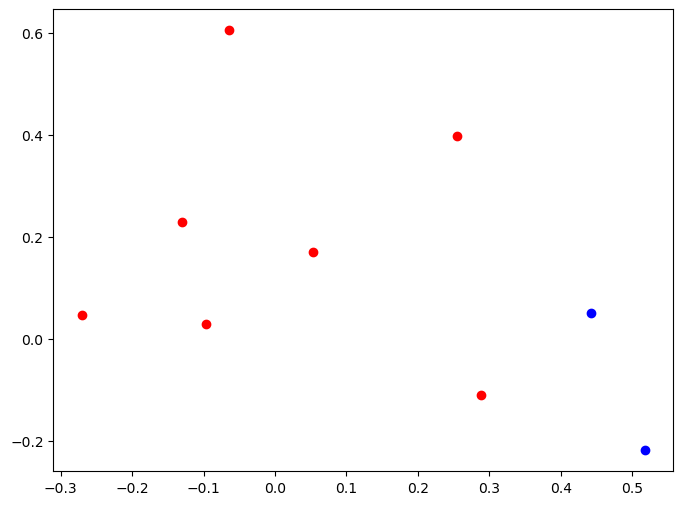

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()